
#<font color='red'>***LINEAR REGRESSION (incomplete)***</font>


Notebook written by <font color='red'>***Pranav Chellagurki***.</font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

How do you understand if you have a good solution? 


Like any problem you have ever encountered, you evaluate your approach by comparing your results with the expected outcome. If they match, then you have a good solution, else, you move on to a different approach.

In the same spirit, we need a method by which we can calculate if the solution provided by the ML algorithm is accurate. In linear regression, we use the Least-squares approach. For each entry in the training set, we can compare the predicted result with the ground truth. The errors have to be squared as we are ONLY interested in the magnitude of the error. 

Now, for EACH value of the parameter, you can imagine that we will have a different value for the TOTAL ERROR. Which should reduce over time. 

Visually, this can be represented as a **PARABOLA**. Why?


\
# **Think about this example**:
\
\
You are on your school bus, on your way back home. Let the Y-axis represent the NUMBER OF STOPS. and let the X-axis represent the DISTANCE FROM YOUR HOME. You can imagine that you get off at stop number 6, which happens to be exactly where your home is located. Now, as you approach stop 6, the distance to your home keeps reducing. The distance WILL be at an ALL time low when STOP 6 arrives. 
But if you were to miss your stop, does the distance from your home remain the same? NO! It increases. If you were to plot this scenario on a graph, it would resemble a parabola.

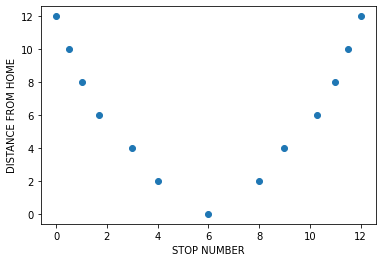

In [ ]:
y=[12,10,8,6,4,2,0,2,4,6,8,10,12]
x=[0,0.5,1,1.7,3,4,6,8,9,10.3,11,11.5,12]

plt.scatter(x, y)
plt.xlabel('STOP NUMBER')
plt.ylabel('DISTANCE FROM HOME')
plt.show()

### The **gradient descent** algorithm is used to essentially **FIND STOP 6.** How do we do that?
\
**The Math in a NON-MATH way**:

Think of the parabola as a slide. If you were to slide into the parabola from one of the ends, where would you finally land? (Assume that you do not build enough momentum to exit the PIT). \
\
AT THE BOTTOM OF THE PIT! Why? because anywhere else, you would slide right into the bottom. \
The gradient descent algorithm uses similar logic. It tries to find the location on the parabola where the **SLOPE=0**. The sides of the parabola are slant, but, at the exact center, the slope reduces to 0.


**The Math**:
\
Essential terms:
What is "slope"?

It is the INCREASE IN Y-AXIS for EACH UNIT INCREASE IN X-AXIS.

Coming back to our school bus example. Assume that the distance between your home and STOP 0 (The school) is 12KM. For easier understanding, Let us **ASSUME** that each stop was placed at equal distances from one another.
\
\
What is the distance between each stop? 2KM!. Hence, for every stop, your distance from your home either decreases or increases by 2KM!
\
**THAT IS THE SLOPE!**
\
\
The Y-AXIS changes by 2km, every time the X-AXIS increases by 1.
\
The slope of a straight line is ALWAYS constant. The slope of the parabola, however, keeps changing. But, for this example let us assume that it stays constant.
\
\
In other words, **you can find the SLOPE by calculating the RATE OF CHANGE IN Y WRT TO X**.



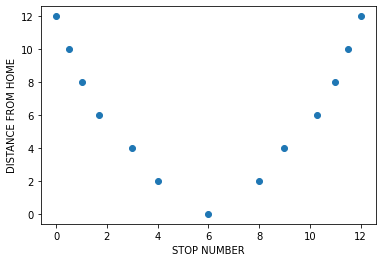

In [ ]:
y=[12,10,8,6,4,2,0,2,4,6,8,10,12]
x=[0,0.5,1,1.7,3,4,6,8,9,10.3,11,11.5,12]

plt.scatter(x, y)
plt.xlabel('STOP NUMBER')
plt.ylabel('DISTANCE FROM HOME')
plt.show()

Say the value of Y @ X1 is V1. Now let us change the value of X by H. The new value of Y @ X1+H is V2. The SLOPE can then be represented by: **(V2-V1)/H**

The CHANGE in Y, wrt CHANGE in X. \

---
Additional INFO: 




We also just learned what a **derivative** is! The derivative at any point gives us the slope @ THAT point.
\
Hence, if we were to iteratively find the DERIVATIVE @ EACH point, then we are BOUND to stumble across the point where the SLOPE is 0. \
\
And that is exactly how **gradient descent works**!


---




**What did we learn SO FAR:**

- SLOPE 

- The total error for different values can be visualized as a parabola. 
- The optimum solution is present at the bottom of the parabola, where the slope=0.
-The optimum solution lies at the point where the slope is 0. 
-We can find the solution, by iteratively finding the derivative at each point, which gives us the slope. This is called gradient descent.

---




**NOTE:**
In reality, the stops aren't equally spaced. If the slope was ALWAYS the same, it would form a LINE. We would then have a V, rather than a U (parabola). 

---


**Terminology alert:**
\
\
TOTAL ERROR: 
\
represents the total error of the system, when compared to our results. This is always calculated by our LOSS FUNCTION, which in this case is Mean Squared Error.
\
\
MEAN SQUARED ERROR:
\
It is exactly what it says. It is the MEAN of the SQUARED ERROR.
\
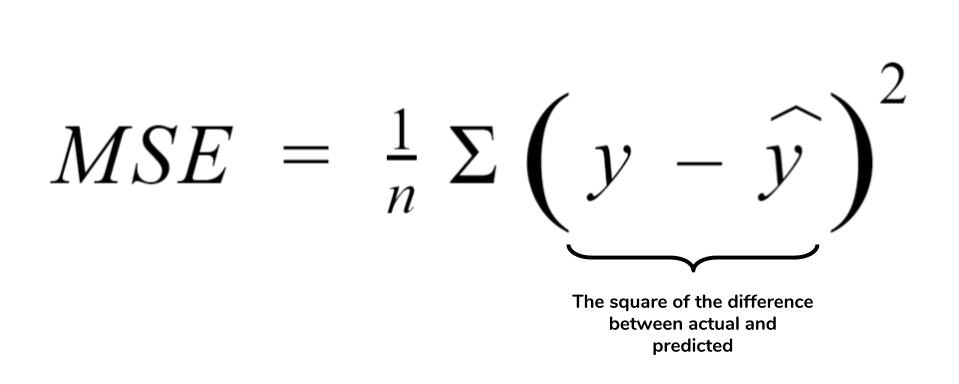
Example: Consider that there are 2 data points with values 2,7. We were able to predict these values as 4,5.
\
MSE = ((2-4)^2 + (7-5)^2) / 2 = 4.

The predicted value is given to us using equation of the LINE: \
# **Y = M*x + C**
\
**M** = Slope of the line.
\
**C** = The Y-intercept of the line.
\
\
For each value of the slope and intercept, a NEW line is formed, which gives us a completely different value for the TOTAL ERROR. \
Hence, WE want to find the optimum solution for both M, and C. \
\
We can draw two different graphs for this.
\
ONE, which shows us the change in TOTAL ERROR wrt to change in C. \



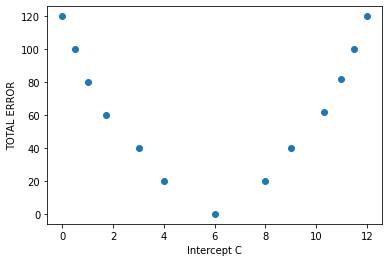

In [ ]:
y=[120,100,80,60,40,20,0,20,40,62,82,100,120]
x=[0,0.5,1,1.7,3,4,6,8,9,10.3,11,11.5,12]

plt.scatter(x, y)
plt.xlabel('Intercept C')
plt.ylabel('TOTAL ERROR')
plt.show()

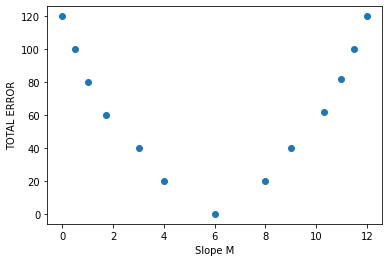

In [ ]:
y=[120,100,80,60,40,20,0,20,40,62,82,100,120]
x=[0,0.5,1,1.7,3,4,6,8,9,10.3,11,11.5,12]

plt.scatter(x, y)
plt.xlabel('Slope M')
plt.ylabel('TOTAL ERROR')
plt.show()

The other which shows us the change in TOTAL ERROR wrt change in M. \
\
We take the derivative at each point for both the graphs (Separately). Until we reach the points where the slope=0, the value of M, and C where the TOTAL ERROR is MiNIMUM (STOP 6 in our School bus example).
\
\
The optimization function then becomes: \
**B = B - (Direvative OF LOSS_FUNCTION wrt B)**
\
**C = C - (Direvative OF LOSS_FUNCTION wrt C)**
\
\
Why do we subtract?
\
\
Let us go back to our School bus example. 
\
\
To reach our Optimum solution, ie, slope=0, we need to move towards STOP 6.\
Say we are at stop 1 and we proceed to stop 3. We move 2 lengths in the X-axis. Our Distance drops from 12 to 8. \
Slope = (8 - 12)/2 = -2. \
Our current value of the STOP number is 3. We need to move towards 6. That is, we need to ADD to the current value of the STOP number.

STOP_number = STOP_number - SLOPE
\
NOTE: Slope = Derivative.

STOP_number then becomes 5. We are now CLOSER to our optimum solution.\
\
Let us consider another case, where we have crossed STOP 6. \
We move from STOP 8 - 9.
Slope = (18 - 16)/1 = +2.
\
\
in This case, we NEED to DECREASE our STOP_number. \
\
STOP_number = STOP_number - (+2) \
It reduces from 8, to 6. \
\
**WE ALWAYS NEED TO MOVE IN THE OPPOSITE DIRECTION OF THE GRADIENT.**


**NEED FOR A SCALING FACTOR (LEARNING RATE)**